# Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The fille ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
data = np.loadtxt('../data/ex1data1.txt', delimiter=',')
print(data[1:5,])

[[  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]]


## Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.)

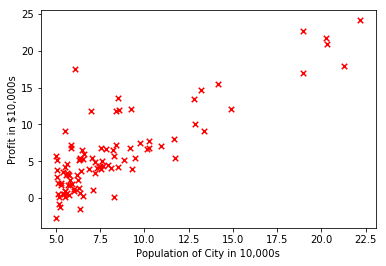

In [2]:
import matplotlib.pyplot as plt

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

plt.scatter(x = data[:,0], y = data[:,1], s = 30, c = 'r', marker = 'x', linewidths=1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Gradient descent
In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

### Update Equations

The objective of linear regression is to minimize the cost function:

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 
\end{equation}

where the hypothesis $h(x)$ is given by the linear model:

\begin{equation}
h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 \cdot x_1
\end{equation}

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm.
In batch gradient descent, each iteration performs the update:

\begin{equation}
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) 
\end{equation}

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

### Computing the cost  $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Once you have completed the function, run computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07.

In [3]:
# Add a column of ones to x
X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

# initialize fitting parameters
theta = np.zeros([2,1])

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

# Compute cost for linear regression
def computeCost(X, y, theta):
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    m = y.size
    J = 1 / (2 * m) * np.sum((X.dot(theta) - y)**2)
    
    return(J)

# compute and display initial cost
print("Initial cost = " + str(computeCost(X, y, theta)))


Initial cost = 32.0727338775


### Gradient descent

Next, you will implement gradient descent in the function gradientDescent. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step.

Assuming you have implemented gradient descent and computeCost correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

After you are finished, use your final parameters to plot the
linear fit.

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

Theta found by gradient descent: 
[[-3.63029144]
 [ 1.16636235]]


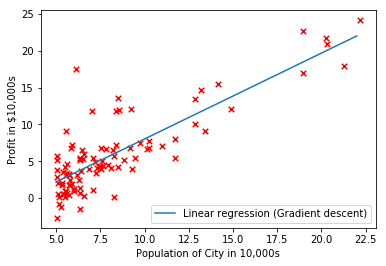

In [4]:
# Perform gradient descent to learn theta
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    
    m = y.size
    J_history = np.zeros([num_iters, 1])
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * 1 / m * (X.T.dot(h - y))
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history
    
# run gradient descent
[theta,  J_history] = gradientDescent(X, y, theta, alpha, iterations);
print('Theta found by gradient descent: \n' + str(theta));

# Plot the linear fit
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

plt.scatter(x = data[:,0], y = data[:,1], 
            s = 30, c = 'r', marker = 'x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.show()

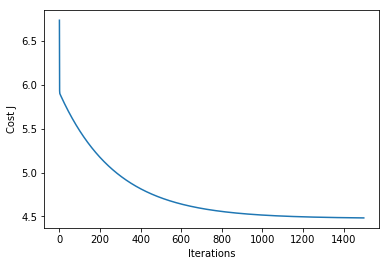

In [5]:
# plot cost J
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

In [6]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = 1 * theta[0] + 3.5 * theta[1] 
print('For population = 35,000, we predict a profit of ' + 
      str(round(predict1[0] * 10000)))

predict2 = 1 * theta[0] + 7.0 * theta[1] 
print('For population = 70,000, we predict a profit of ' + 
      str(round(predict2[0] * 10000)))

For population = 35,000, we predict a profit of 4520.0
For population = 70,000, we predict a profit of 45342.0


## Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

In the next step, there is code to calculate $J(\theta)$ over a grid of values using the computeCost function.

In [7]:
# Grid over which we will calculate J
B0 = np.linspace(-10, 10, 100)
B1 = np.linspace(-1, 4, 100)
xx, yy = np.meshgrid(B0, B1, indexing='xy')

# initialize J_vals to a matrix of 0'
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

The next lines will  use these values to produce surface and contour plots of $J(\theta)$ using the plot_surface and contour commands.

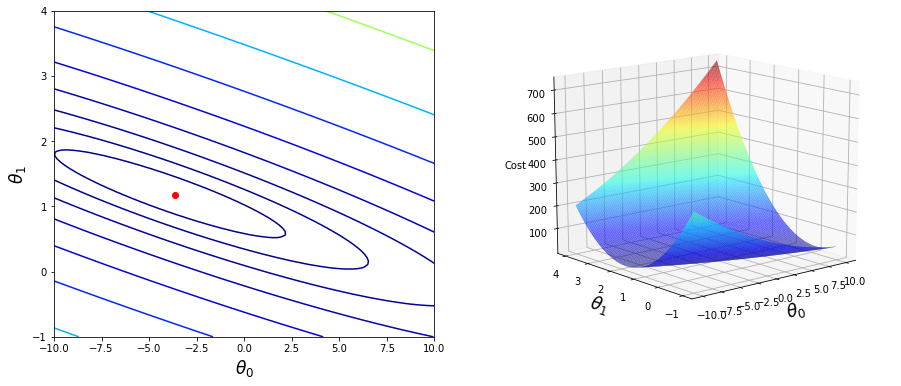

In [8]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.